### Importing Data from Kaggle

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
!pip install -q kaggle

# Let's make sure the kaggle.json file is present.
!ls -lha kaggle.json

# Next, install the Kaggle API client.
!pip install -q kaggle

# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

# !kaggle datasets download -d bharath150/minidata

# !unzip minidata.zip

-rw-r--r-- 1 root root 72 Jun 25 22:32 kaggle.json


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import zipfile as zf
import re
import random
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
!kaggle competitions download -c jigsaw-toxic-comment-classification-challenge

 95% 25.0M/26.3M [00:01<00:00, 17.2MB/s]
100% 26.3M/26.3M [00:01<00:00, 23.7MB/s]
  0% 0.00/1.39M [00:00<?, ?B/s]
100% 1.39M/1.39M [00:00<00:00, 197MB/s]
 90% 21.0M/23.4M [00:01<00:00, 12.1MB/s]
100% 23.4M/23.4M [00:01<00:00, 12.5MB/s]
  0% 0.00/1.46M [00:00<?, ?B/s]
100% 1.46M/1.46M [00:00<00:00, 97.4MB/s]


In [ ]:
!unzip train.csv.zip
!unzip test.csv.zip
!unzip test_labels.csv.zip
!unzip sample_submission.csv.zip

Archive:  train.csv.zip
  inflating: train.csv               
Archive:  test.csv.zip
  inflating: test.csv                
Archive:  test_labels.csv.zip
  inflating: test_labels.csv         
Archive:  sample_submission.csv.zip
  inflating: sample_submission.csv   


In [ ]:
# import pandas as pd
# train_data = pd.read_csv('/kaggle/input/toxic-comment-classification/train.csv/train.csv')

# test_data = pd.read_csv('/kaggle/input/toxic-comment-classification/test.csv/test.csv')

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import zipfile as zf
import re
import random
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
train_data = pd.read_csv('train.csv.zip')
train_data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


The toxic data set is categorised into 6 different categories. Each comment is categorised into either one of the labels. We can observe that, few of the comments are not given any labels. 

In [ ]:
test_data = pd.read_csv('test.csv.zip')
test_data.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [ ]:
train_data.isnull().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

In [ ]:
train_data.drop(['id'],axis=1,inplace=True)
test_data.drop(['id'],axis=1,inplace=True)
train_data.head()

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


We can observe in the above cell, there are html remarks, exclaimatory remarks, and capital letters in the text. In order to obtain accurate sentiment from the text, there is need to clean the data and make the text understandable to the model, applied. So the below is the steps applied for pre-processing of the text.  

## Pre-Processing

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
from nltk.tokenize import word_tokenize
import re
import string
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

def clean_data(data_t):
  html = re.compile(r'<.*?>')
  data_t =  re.sub(html,'',data_t)
  data_t =  re.sub('\[[^]]*\]','',data_t)
  data_t = data_t.lower()
  special_char = r'[^a-zA-z0-9\s]'
  data_t = re.sub(special_char,'',data_t)
  data_t = re.sub('\n','' ,data_t)

  return data_t
train_data['comment_text'] = train_data['comment_text'].apply(lambda x: clean_data(x))
train_data['comment_text'] = train_data['comment_text'].map(lambda x: x.strip())


test_data['comment_text'] = test_data['comment_text'].apply(lambda x: clean_data(x))
test_data['comment_text'] = test_data['comment_text'].map(lambda x: x.strip())
train_data['comment_text'].head()

0    explanationwhy the edits made under my usernam...
1    daww he matches this background colour im seem...
2    hey man im really not trying to edit war its j...
3    morei cant make any real suggestions on improv...
4    you sir are my hero any chance you remember wh...
Name: comment_text, dtype: object

Initially pre-processing steps include, removing html remarks, lowering the letters, removing puncuation marks. After applying the steps, we can observe the changes in the sample train data, where there is no instance of html, all the letters are in lower, and all the punctuation remarks are removed. 
Further, we apply stop words, tokenization and lemmatization techniques

In [ ]:
train_data['comment_text'].sample(n=10)

69322     i wrote that shit ages ago what are you a slak...
14577     these abuses have no place in wikipedia taunti...
159067    you mean it is funny because no reliable sourc...
83312     enough vandalism child your edits are neither ...
38209     thank you for your patience i hope all of this...
151825    dude giacomo if you want a better website try ...
3412      im ready now to try to improve the article but...
78038     the last sentance of this article doesnt make ...
1064      your bizarre fascination with me is disturbing...
43364     unblock although they may be in ill taste to s...
Name: comment_text, dtype: object

In [ ]:
def remove_stopwords(data_t):
   stop_words = set(stopwords.words('english'))

   words_token = word_tokenize(data_t)
   s = [w for w in words_token if  w not in stop_words]
   return s 
lemmatizer = WordNetLemmatizer()
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
# def lemma(data_t):
#     return [lemmatizer.lemmatize(word) for word in data_t]
def lemmatization(words):
  #new = []

  #new.append(lem_words)
  words =  [lemmatizer.lemmatize(x) for x in words]
  return words
# def lemmatization(s):
#   s = [wnl.lemmatize(word) for word in s]
#   return s

    




The text in tokenization step, we break the sentence into words. Obtained words are applied english stop words, where the important words in the english corpus is identified and stored, while the other unimportant words are removed. Later,  in the lemmatization step, various forms of the words are turned into a single word. Eg: run , ran, running is made into run. 

In [ ]:
train_data['comment_text']

0         explanationwhy the edits made under my usernam...
1         daww he matches this background colour im seem...
2         hey man im really not trying to edit war its j...
3         morei cant make any real suggestions on improv...
4         you sir are my hero any chance you remember wh...
                                ...                        
159566    and for the second time of asking when your vi...
159567    you should be ashamed of yourself that is a ho...
159568    spitzer umm theres no actual article for prost...
159569    and it looks like it was actually you who put ...
159570    and  i really dont think you understand  i cam...
Name: comment_text, Length: 159571, dtype: object

The above data is the pre-processed data, however, we can still see there are words like trying, asking, actually, even after lemmatization step, this is becaused, in the lemmazition of the words are usually transformed into same lemma if they have same parts of speech.

In [ ]:
train_data['comment_text'] = train_data['comment_text'].apply(lambda x: remove_stopwords(x))
#train_data['comment_text'] = train_data['comment_text'].apply(lambda x: word_tokenize(x))
train_data['comment_text']




0         [explanationwhy, edits, made, username, hardco...
1         [daww, matches, background, colour, im, seemin...
2         [hey, man, im, really, trying, edit, war, guy,...
3         [morei, cant, make, real, suggestions, improve...
4                [sir, hero, chance, remember, page, thats]
                                ...                        
159566    [second, time, asking, view, completely, contr...
159567    [ashamed, horrible, thing, put, talk, page, 12...
159568    [spitzer, umm, theres, actual, article, prosti...
159569    [looks, like, actually, put, speedy, first, ve...
159570    [really, dont, think, understand, came, idea, ...
Name: comment_text, Length: 159571, dtype: object

In [ ]:
# train_data['comment_text'] = train_data['comment_text'].apply(lemmatization)

#train_data['comment_text'] = train_data['comment_text'].assign(col_lemma = train_data.col.apply(lambda x: lemmatize(x)))
# train_data = train_data.assign(comment_text = train_data.col.apply(lambda x: lemma(x)))
train_data = train_data.assign(comment_text = train_data.comment_text.apply(lambda x: lemmatization(x)))
train_data['comment_text'].head()

0    [explanationwhy, edits, made, username, hardco...
1    [daww, match, background, colour, im, seemingl...
2    [hey, man, im, really, trying, edit, war, guy,...
3    [morei, cant, make, real, suggestion, improvem...
4           [sir, hero, chance, remember, page, thats]
Name: comment_text, dtype: object

In [ ]:
test_data['comment_text'] = test_data['comment_text'].apply(lambda x: remove_stopwords(x))
#train_data['comment_text'] = train_data['comment_text'].apply(lambda x: word_tokenize(x))
#test_data['comment_text'] = test_data['comment_text'].words.apply(lemmatization)
test_data = test_data.assign(comment_text = test_data.comment_text.apply(lambda x: lemmatization(x)))
test_data['comment_text'].head()

0    [yo, bitch, ja, rule, succesful, youll, ever, ...
1                              [rfc, title, fine, imo]
2                      [source, zawe, ashton, lapland]
3    [look, back, source, information, updated, cor...
4                   [dont, anonymously, edit, article]
Name: comment_text, dtype: object

In [ ]:
train_data['comment_text'].sample(n =10)


50256     [ed, trice, checker, hi, saw, changed, checker...
32034     [utcbache, simple, mean, brat, modern, general...
99895     [dont, guy, refer, main, shadow, cabinet, arti...
4279      [short, consensus, agreement, least, four, fiv...
86202     [could, ask, reliable, source, noticeboard, al...
46043     [welcomehello, welcome, wikipedia, appreciate,...
137101    [removed, several, event, added, mostly, conne...
151583    [sigh, people, always, forget, doesnt, matter,...
133189    [agree, summaryin, view, textbook, example, fo...
23427     [sir, corporation, least, wikipediaarticle, le...
Name: comment_text, dtype: object

In [ ]:
train_data['comment_text'].head()

0    [explanationwhy, edits, made, username, hardco...
1    [daww, match, background, colour, im, seemingl...
2    [hey, man, im, really, trying, edit, war, guy,...
3    [morei, cant, make, real, suggestion, improvem...
4           [sir, hero, chance, remember, page, thats]
Name: comment_text, dtype: object

In [ ]:
train_data["commentsLength"]= train_data["comment_text"].str.len()
train_data.head()

df = train_data.info()





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   comment_text        159571 non-null  object 
 1   toxic               159571 non-null  int64  
 2   severe_toxic        159571 non-null  int64  
 3   obscene             159571 non-null  int64  
 4   threat              159571 non-null  int64  
 5   insult              159571 non-null  int64  
 6   identity_hate       159571 non-null  int64  
 7   commentsLength      159571 non-null  int64  
 8   sentiment           159571 non-null  float64
 9   comment_str         159571 non-null  object 
 10  comment_len         159571 non-null  int64  
 11  word_count          159571 non-null  int64  
 12  sentiment_category  159571 non-null  object 
dtypes: float64(1), int64(9), object(3)
memory usage: 15.8+ MB


In [ ]:
train_data['commentsLength']

0         27
1         14
2         22
3         50
4          6
          ..
159566    24
159567     7
159568     9
159569     9
159570    19
Name: commentsLength, Length: 159571, dtype: int64

# Transformation of Data 

## Caluation of Number of Comments, Len of Comments and Sentiment 

In [ ]:
from textblob import TextBlob
train_data['sentiment'] = train_data['comment_text'].map(lambda x: TextBlob(str(x)).sentiment.polarity)
train_data['comment_str'] = train_data['comment_text'].apply(lambda x: ','.join(map(str, x)).replace(',',' '))
test_data['comment_str'] = test_data['comment_text'].apply(lambda x: ','.join(map(str, x)).replace(',',' '))
train_data['comment_str'][0]
train_data['comment_len'] = train_data['comment_str'].astype(str).apply(len)
train_data['comment_str'][0]
train_data['word_count'] = train_data['comment_str'].apply(lambda x: len(str(x).split()))
train_data

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,commentsLength,sentiment,comment_str,comment_len,word_count
0,"[explanationwhy, edits, made, username, hardco...",0,0,0,0,0,0,27,0.136364,explanationwhy edits made username hardcore me...,187,27
1,"[daww, match, background, colour, im, seemingl...",0,0,0,0,0,0,14,0.200000,daww match background colour im seemingly stuc...,84,14
2,"[hey, man, im, really, trying, edit, war, guy,...",0,0,0,0,0,0,22,0.150000,hey man im really trying edit war guy constant...,144,22
3,"[morei, cant, make, real, suggestion, improvem...",0,0,0,0,0,0,50,0.183333,morei cant make real suggestion improvement wo...,381,50
4,"[sir, hero, chance, remember, page, thats]",0,0,0,0,0,0,6,0.000000,sir hero chance remember page thats,35,6
...,...,...,...,...,...,...,...,...,...,...,...,...
159566,"[second, time, asking, view, completely, contr...",0,0,0,0,0,0,24,0.220000,second time asking view completely contradicts...,183,24
159567,"[ashamed, horrible, thing, put, talk, page, 12...",0,0,0,0,0,0,7,-1.000000,ashamed horrible thing put talk page 128611993,46,7
159568,"[spitzer, umm, there, actual, article, prostit...",0,0,0,0,0,0,9,0.000000,spitzer umm there actual article prostitution ...,65,9
159569,"[look, like, actually, put, speedy, first, ver...",0,0,0,0,0,0,9,0.125000,look like actually put speedy first version de...,56,9


Here, we are extracting few numbers from the text, to quantify the corpus. Finding the number of words in the sentence as commentsLength, characters of each comment as comment_len, sentiment of each sentence is calculated using Textblob where it gives the polarity of the sentence, where it is positive or negative. This value ranges from [-1,1], where -1 is extreme negavtive and 1 being a postive comment. 

In [ ]:
train_data['sentiment_category'] = train_data['sentiment'].apply(lambda x: 'positive' if x>0 else 'negative')

In [ ]:
train_data['sentiment_category'].value_counts()

positive    80566
negative    79005
Name: sentiment_category, dtype: int64

Categorizing the sentiments into postive and negative. Here, the comments are almost equally distributed as positive and negative. 

In [ ]:
train_data

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,commentsLength,sentiment,comment_str,comment_len,word_count,sentiment_category
0,"[explanationwhy, edits, made, username, hardco...",0,0,0,0,0,0,27,0.136364,explanationwhy edits made username hardcore me...,187,27,positive
1,"[daww, match, background, colour, im, seemingl...",0,0,0,0,0,0,14,0.200000,daww match background colour im seemingly stuc...,84,14,positive
2,"[hey, man, im, really, trying, edit, war, guy,...",0,0,0,0,0,0,22,0.150000,hey man im really trying edit war guy constant...,144,22,positive
3,"[morei, cant, make, real, suggestion, improvem...",0,0,0,0,0,0,50,0.183333,morei cant make real suggestion improvement wo...,381,50,positive
4,"[sir, hero, chance, remember, page, thats]",0,0,0,0,0,0,6,0.000000,sir hero chance remember page thats,35,6,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...
159566,"[second, time, asking, view, completely, contr...",0,0,0,0,0,0,24,0.220000,second time asking view completely contradicts...,183,24,positive
159567,"[ashamed, horrible, thing, put, talk, page, 12...",0,0,0,0,0,0,7,-1.000000,ashamed horrible thing put talk page 128611993,46,7,negative
159568,"[spitzer, umm, there, actual, article, prostit...",0,0,0,0,0,0,9,0.000000,spitzer umm there actual article prostitution ...,65,9,negative
159569,"[look, like, actually, put, speedy, first, ver...",0,0,0,0,0,0,9,0.125000,look like actually put speedy first version de...,56,9,positive


The table consists of Categorical variables, and data like number of words per comments and len of a comment. This data helps us to identify the word count and the related sentiment. The sentiment column ranges from [-1,1] 

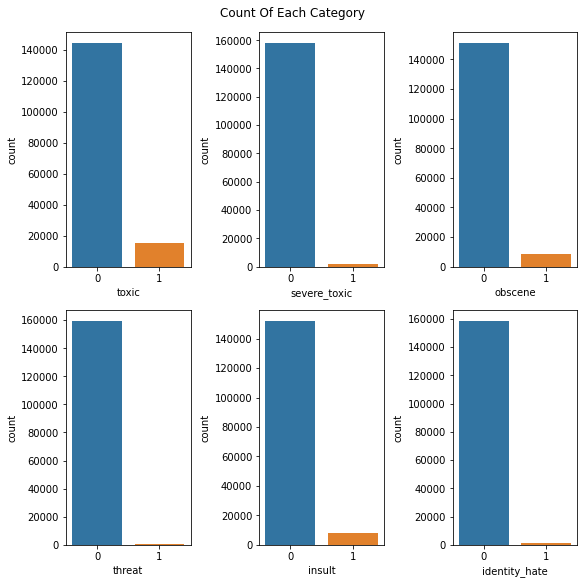

In [ ]:
import seaborn as sns
fig , axes = plt.subplots(2,3,figsize = (8,8), constrained_layout = True)
sns.countplot(ax=axes[0,0],x=train_data['toxic'],data=train_data )
sns.countplot(ax=axes[0,1],x=train_data['severe_toxic'],data=train_data)
sns.countplot(ax=axes[0,2],x=train_data['obscene'],data=train_data)
sns.countplot(ax = axes[1,0],x=train_data['threat'],data=train_data)
sns.countplot(ax=axes[1,1],x=train_data['insult'],data=train_data)
sns.countplot(ax=axes[1,2],x=train_data['identity_hate'],data=train_data)
plt.suptitle('Count Of Each Category')
plt.show()

The above visualization, illustrates that most of the comments are 0 ie they are not labeled in any of the categories. In the overall, data only few comments are being categorised into each labels.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


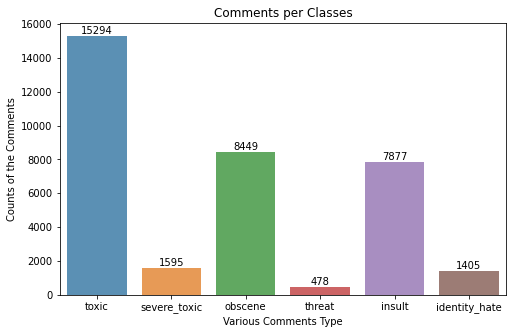

In [ ]:
# Checking the count of the various types of words
import seaborn as sns
cols = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
targets = train_data[cols].values

train_df = train_data['comment_text']
test_df = test_data['comment_text']


val_counts = train_data[cols].sum()

plt.figure(figsize=(8,5))
ax = sns.barplot(val_counts.index, val_counts.values, alpha=0.8)

plt.title("Comments per Classes")
plt.xlabel("Various Comments Type")
plt.ylabel("Counts of the Comments")

rects = ax.patches
labels = val_counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height+5, label, ha="center", va="bottom")


plt.show()

The visuliazation illustrates that, the dataset is imbalanced. Categories like threat, severe_toxic and identity hate are quite low comments and toxic, obsence, and insult have higher records of comments 

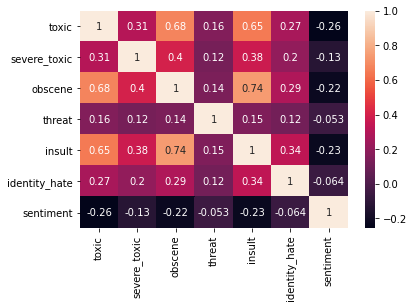

In [ ]:
import seaborn as sns
target = train_data.drop(['comment_str','comment_len','commentsLength','word_count'],axis=1)
corrmat = target.corr()
sns.heatmap(corrmat,annot = True)
plt.show()

In the correlation, heatmap we can observe that each comment is linearly correlated with each other. For example, if we take toxic and insult is 0.65, then toxic and insult are 65% proportional to each other, if toxic is increased the insult will increase by 65%. 

In [ ]:
train_str = train_data['comment_str']
test_str = test_data['comment_str']

In [ ]:
train_str

0         explanationwhy edits made username hardcore me...
1         daww match background colour im seemingly stuc...
2         hey man im really trying edit war guy constant...
3         morei cant make real suggestion improvement wo...
4                       sir hero chance remember page thats
                                ...                        
159566    second time asking view completely contradicts...
159567       ashamed horrible thing put talk page 128611993
159568    spitzer umm there actual article prostitution ...
159569    look like actually put speedy first version de...
159570    really dont think understand came idea bad rig...
Name: comment_str, Length: 159571, dtype: object

## Data Modelling 

The given data is a multi-classification problem, and it is large dataset with (159570, 8). In order to obtain robust, accurate results to a large dataset, I have choosen XGboost model. XGboost model has in built functionality to regularise the parameters, uses K-fold technique on the data to exhaust all possible combinations and be robust to overfitting of the model. It also uses parallelization technique, ie. two different parameter are tuned separately even though the process is sequential.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer            =  TfidfVectorizer()
train_tfidf_feature = vectorizer.fit_transform(train_str)
test_tfidf_feature = vectorizer.transform(test_str)

train_df = pd.DataFrame(train_tfidf_feature)
test_df = pd.DataFrame(test_tfidf_feature)

In [ ]:
train_df

,0
0,"(0, 177194)\t0.34053217869040103\n (0, 2110..."
1,"(0, 264553)\t0.17654439389634835\n (0, 8160..."
2,"(0, 131555)\t0.23164764694148235\n (0, 2017..."
3,"(0, 275429)\t0.2645663827119061\n (0, 86092..."
4,"(0, 247784)\t0.307881118430025\n (0, 208759..."
...,...
159566,"(0, 65063)\t0.2984505195904996\n (0, 67485)..."
159567,"(0, 2601)\t0.6725800481647614\n (0, 33407)\..."
159568,"(0, 232166)\t0.4646367911394492\n (0, 69238..."
159569,"(0, 201604)\t0.3131167847443574\n (0, 20180..."


In [ ]:
col_target = ['toxic','severe_toxic','obscene','threat','insult','identity_hate']

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
# from sklearn.metrics import roc_auc_score
clf = XGBClassifier(use_label_encoder =False,eval_metric='logloss')

In [ ]:
train_labels = train_data.drop(['comment_text','commentsLength','sentiment','comment_str','comment_len','word_count','sentiment_category'],axis =1)
train_labels

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
159566,0,0,0,0,0,0
159567,0,0,0,0,0,0
159568,0,0,0,0,0,0
159569,0,0,0,0,0,0


In [ ]:
from sklearn.metrics import classification_report
from sklearn.datasets import make_classification
from sklearn.metrics import log_loss

submission_binary1 = pd.read_csv('sample_submission.csv')
# target_names =['toxic','severe_toxic','obscene','threat','insult']
# j= [1,2,3,4,5,6]
# for i in col_target:
#     y = train_labels[i]
#     clf.fit(train_tfidf_feature,y)
#     y_pred_X = clf.predict(train_tfidf_feature)
#     print('Train probability is {}'.format(accuracy_score(y,y_pred_X)))
#     print(classification_report(y , y_pred_X, labels= target_names))
#     #avg_logloss = log_los(y, y_pred_X)
#     #print(avg_logloss)
# #     precision = precision_score(y, y_pred_X)
# #     print('Precision: %.3f' % precision)
# #     recall = recall_score (y_pred_X)
# #     print('Recall: %.3f' % recall)
# #     score = f1_score(y_pred_X)
# #     print('F-Measure: %.3f' % score)
#     test_y = clf.predict_proba(test_tfidf_feature)[:1]
#     submission_binary1[i] = test_y
for i in col_target:
  y = train_labels[i]
  clf.fit(train_tfidf_feature,y)
  y_pred_X = clf.predict(train_tfidf_feature)
  print('Train probability is {}'.format(accuracy_score(y,y_pred_X)))
  print(classification_report(y , y_pred_X))
  test_y = clf.predict_proba(test_tfidf_feature)[:,1]
  print("Testing Probability is {}".format(test_y))
  submission_binary1[i] = test_y

Train probability is 0.9402209674690263
              precision    recall  f1-score   support

           0       0.94      1.00      0.97    144277
           1       0.96      0.39      0.56     15294

    accuracy                           0.94    159571
   macro avg       0.95      0.70      0.76    159571
weighted avg       0.94      0.94      0.93    159571

Testing Probability is [0.97962415 0.07284041 0.05569197 ... 0.06956717 0.07284041 0.5888231 ]
Train probability is 0.9911136735371715
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    157976
           1       0.76      0.16      0.27      1595

    accuracy                           0.99    159571
   macro avg       0.88      0.58      0.63    159571
weighted avg       0.99      0.99      0.99    159571

Testing Probability is [0.07454663 0.00505037 0.00384886 ... 0.00431286 0.00505037 0.00472714]
Train probability is 0.9738235644321337
              precision    recall  f

The above results, demostrate the train data accuracy percentage and test data probablity prediction of each data. The precision and recall and f1-score of each class is calculated, 
The Precision is highest for toxic and lowest for severe_toxic, meaning, the prediction the actual correct values out of all correct values is good for the model.
The recall is highest for obscene category and lowest for severe_toxic. ie the prediction of actual true values out of the all the predictions. 
The train accuracy is highest for threat and lowest for toxic classes. 

In [ ]:

submission_binary1.to_csv('submission_binary_xgb.csv',index=False)

In the kaggle competion, after submiting rge csv file, the obtained accuracy is 95.2% on the test data probabilty for all the classes. The model performance based on the evaluation metrics, like precsion, recall and accuracy quatify the precision is quite high for all the classes. The recall is  quite low for all the categories overall. To predict the classes of the comments, XGBoost has low recall and high precision, which means that the model does not catch all possible prediction, it misses few predictions of the classes. 

In [ ]:
test_y

array([[0.02037585, 0.97962415]], dtype=float32)